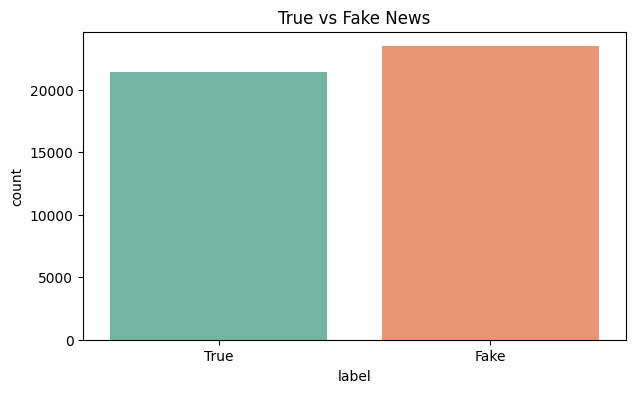

Accuracy: 0.9853006681514477
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6433
           1       0.99      0.98      0.99      7037

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

Confusion Matrix:
 [[6349   84]
 [ 114 6923]]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load datasets

fake=pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")
true=pd.read_csv("../input/fake-and-real-news-dataset/True.csv")

# Label the data
fake["label"] = 1
true["label"] = 0

# Merge and shuffle
df = pd.concat([fake, true]).sample(frac=1, random_state=1).reset_index(drop=True)
df["text"] = df["title"] + " " + df["text"]
df = df[["text", "label"]]

# Bar plot to show class balance
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="label", palette="Set2")
plt.xticks([0, 1], ["True", "Fake"])
plt.title("True vs Fake News")
plt.show()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.3, random_state=42)

# Build model
model = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english", max_df=0.7)),
    ("logreg", LogisticRegression(max_iter=1000))
])

# Train
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)

# Evaluation
print("Accuracy:", metrics.accuracy_score(y_test, preds))
print(metrics.classification_report(y_test, preds))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, preds))



In [7]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Assuming 'y_test' are your true labels and 'preds' are the model predictions:
print("Classification Report:")
print(classification_report(y_test, preds, target_names=["True News", "Fake News"]))

# If you want to extract the values directly:
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


Classification Report:
              precision    recall  f1-score   support

   True News       0.98      0.99      0.98      6433
   Fake News       0.99      0.98      0.99      7037

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

Precision: 0.9880
Recall:    0.9838
F1-Score:  0.9859


Total samples: 44898
Fake news count: 23481
True news count: 21417
Average words per article: 417.7357566038576


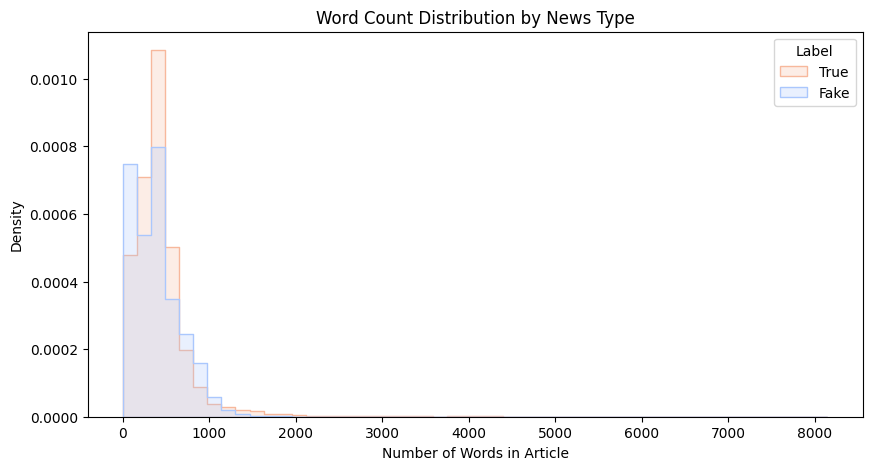

s: 173041
trump: 113012
said: 93455
president: 46875
t: 42246
people: 35264
new: 32256
donald: 27942
state: 27408
just: 25768


In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Dataset overview

print("Total samples:", len(df))
print("Fake news count:", df['label'].sum())
print("True news count:", len(df) - df['label'].sum())

# Average word count per article
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
print("Average words per article:", df['word_count'].mean())

# Compare word counts between real and fake
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='word_count', hue='label', bins=50, palette='coolwarm', element='step', stat='density')
plt.title("Word Count Distribution by News Type")
plt.xlabel("Number of Words in Article")
plt.ylabel("Density")
plt.legend(title='Label', labels=['True', 'Fake'])
plt.show()

# Top 10 most common words (excluding stopwords)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

all_words = " ".join(df['text']).lower().split()
filtered_words = [word for word in all_words if word not in ENGLISH_STOP_WORDS and word.isalpha()]

top_words = Counter(filtered_words).most_common(10)
for word, freq in top_words:
    print(f"{word}: {freq}")


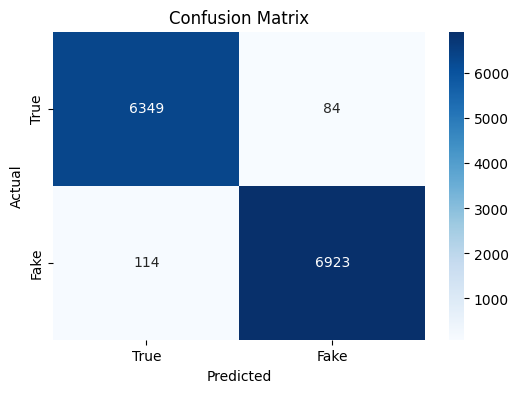

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
